In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
tempo = pd.read_excel('Time-Use-in-OECD-Countries-OECD.xlsx')
df_2 = pd.read_csv('Completo.csv')

In [3]:
tempo_use = tempo[tempo['Country'] == 'India']

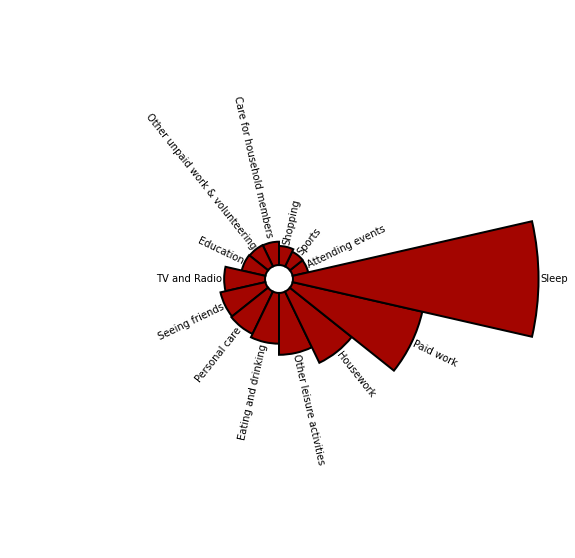

In [4]:
tempo_use = tempo_use.sort_values('Time (minutes)')

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = tempo_use['Time (minutes)'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * tempo_use['Time (minutes)'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(tempo_use.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(tempo_use.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="black",
    color="#A30500",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, tempo_use["Category"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

In [5]:
import tidyverse

ModuleNotFoundError: No module named 'tidyverse'

In [6]:
# library
library(tidyverse)
 
# Create dataset
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(10,100), 60, replace=T)
)
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 4
to_add <- data.frame( matrix(NA, empty_bar*nlevels(data$group), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(levels(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  geom_bar(stat="identity", alpha=0.5) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p

SyntaxError: invalid syntax (Temp/ipykernel_14328/1300179800.py, line 13)

In [9]:
def to_seconds(value, time_unit):
    if time_unit == "seconds":
        return value
    elif time_unit == "minutes":
        return value * 60
    elif time_unit == "hours":
        return value * 60 * 60
    elif time_unit == "days":
        return value * 60 * 27
    elif time_unit == "weeks":
        return value * 60 * 24 * 7
    elif time_unit == "months":
        return value * 60 * 24 * 30
    elif time_unit == "years":
        return value * 60 * 24 * 365
    else:
        return np.nan

In [16]:
df_2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Country', 'Value', 'Lower_value',
       'Upper_value', 'Unnamed: 0.1.1', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'new_value', 'Region',
       'Happiness Rank', 'Average Temperature'],
      dtype='object')

In [17]:
TIMES = [
    to_seconds(row["Country"], row["Value"])
    for _, row in df_2.iterrows()
]
TIME_MAX = np.max(TIMES)
TIME_MIN = np.min(TIMES)

# 'low' and 'high' refer to the final dot size.
def scale_to_interval(x, low=1, high=60):
    return ((x - TIME_MIN) / (TIME_MAX - TIME_MIN)) * (high - low) + low

In [19]:
# Different sades of grey used in the plot
GREY88 = "#e0e0e0"
GREY85 = "#d9d9d9"
GREY82 = "#d1d1d1"
GREY79 = "#c9c9c9"
GREY97 = "#f7f7f7"
GREY60 = "#999999"

# Values for the x axis
ANGLES = np.linspace(0, 2 * np.pi, len(TIMES), endpoint=False)

# Heights of the lines and y-position of the dot are given by the times.
HEIGHTS = np.array(TIMES)

# Category values for the colors
CATEGORY_CODES = pd.Categorical(df_2["Region"]).codes

# Colormap taken from https://carto.com/carto-colors/
COLORMAP = ["#5F4690", "#1D6996", "#38A6A5", "#0F8554", "#73AF48", 
            "#EDAD08", "#E17C05", "#CC503E", "#94346E", "#666666"]

# Select colors for each password according to its category.
COLORS = np.array(COLORMAP)[CATEGORY_CODES]


# This is going to be helpful to create some space for labels within the circle 
# Don't worry if it doesn't make much sense yet, you're going to see it in action below
PLUS = 1000

C:\Users\Federico\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


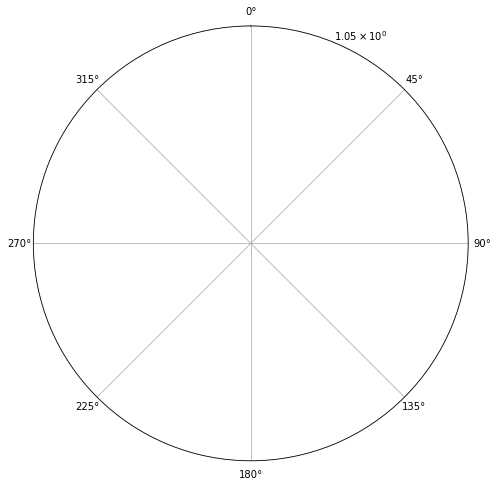

In [20]:
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Use logarithmic scale for the radial axis
ax.set_rscale('symlog')

# Angular axis starts at 90 degrees, not at 0
ax.set_theta_offset(np.pi / 2)

# Reverse the direction to go counter-clockwise.
ax.set_theta_direction(-1)

# Add lines
ax.vlines(ANGLES, 0 + PLUS, HEIGHTS + PLUS, color=COLORS, lw=0.9)

# Add dots
ax.scatter(ANGLES, HEIGHTS + PLUS, s=scale_to_interval(HEIGHTS), color=COLORS);

In [21]:
# Start by removing spines for both axes
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Remove grid lines, ticks, and tick labels.
ax.grid(False)
ax.set_xticks([])
ax.set_yticklabels([])

# Add our custom grid lines for the radial axis.
# These lines indicate one day, one week, one month and one year.
HANGLES = np.linspace(0, 2 * np.pi, 200)
ax.plot(HANGLES, np.repeat(1 * 24 * 60 + PLUS, 200), color= GREY88, lw=0.7)
ax.plot(HANGLES, np.repeat(7 * 24 * 60 + PLUS, 200), color= GREY85, lw=0.7)
ax.plot(HANGLES, np.repeat(30 * 24 * 60 + PLUS, 200), color= GREY82, lw=0.7)
ax.plot(HANGLES, np.repeat(365 * 24 * 60 + PLUS, 200), color= GREY79, lw=0.7)

# Add labels for the four selected passwords, which are the most complicated
# passwords to crack.
for idx, row in LABELS_DF.iterrows():
    color = COLORS[row["index"]]
    ax.text(
        x=ANGLES[row["x"]], y=row["y"], s=row["label"], color=color,
        ha="right", va="center", ma="center", size=8,
        family="Roboto Mono", weight="bold"
    )

fig

NameError: name 'LABELS_DF' is not defined